In [9]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [10]:
print("============查看GPU信息================")
# 查看GPU信息
!/opt/bin/nvidia-smi
print("============查看虚拟机硬盘容量================")
# 查看虚拟机硬盘容量
!df -lh
print("============查看cpu配置================")
# 查看cpu配置
!cat /proc/cpuinfo | grep model\ name
print("=============查看内存容量===============")
# 查看内存容量
!cat /proc/meminfo | grep MemTotal

============查看GPU信息================
Sun Feb 26 12:16:38 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P0    27W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                    

In [11]:
%cd //content/gdrive/MyDrive/GridSearchCVSVR
!pwd
!ls

/content/gdrive/MyDrive/GridSearchCVSVR
/content/gdrive/MyDrive/GridSearchCVSVR
data  README.md  SVR.ipynb


In [1]:
# 导入需要的库函数
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
data = pd.read_excel("./data/关键影响因素.xlsx")
data.head()

,第二产业增加值,社会消费品零售总额（万元）,工业主要产品产量（吨）,第三产业增加值,等级公路里程(公里),居民消费水平（元）,社会固定资产投资总额（亿元）,公路营运载货汽车吨位数(吨),第一产业增加值,公路营运载货汽车拥有量(万辆),铁路营业里程(公里),公路里程(公里),货运量（万吨）
0,4.17,138532,224514.0,10.86,8300.0,800.0,10.5665,16400,15.50,0.25,0.0,21800.0,131.37
1,4.46,152265,241124.0,12.69,8300.0,903.0,13.3300,16200,16.14,0.24,0.0,21800.0,144.85
2,5.49,182788,223269.0,14.12,8300.0,931.0,18.1500,13800,17.81,0.21,0.0,21800.0,153.62
3,7.87,210170,239160.0,17.55,8300.0,1110.0,21.1700,13500,20.57,0.20,0.0,21800.0,160.95
4,13.23,247982,341255.0,20.03,10500.0,1202.0,36.9500,13000,22.85,0.19,0.0,22400.0,178.12


In [2]:
from sklearn.preprocessing import MinMaxScaler

In [3]:
# 确定数据集X和Y
X = MinMaxScaler().fit_transform(data.iloc[:,:-1])
Y = data.iloc[:,-1]

In [4]:
#分割数据集的函数，test_siz用于决定训练集与测试集的分割比例，random_state表示按指定的数值来获取指定的随机分配
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.2,random_state=42)
#恢复分割后的索引
for i in [Ytrain, Ytest]:
    i.index = range(i.shape[0])

In [5]:
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
# 重新调整Ytrain与Ytest维度
# Ytrain = Ytrain.iloc[:,0].ravel()
# Ytest = Ytest.iloc[:,0].ravel()
kernels = ['linear','poly','rbf','sigmoid']
for kernel in kernels:
    svr = SVR(kernel=kernel).fit(Xtrain,Ytrain)
    Ypredict = svr.predict(Xtest)
    # print(kernel+"核函数支持向量机的默认评估值为: ", svr.score(Xtest, Ytest))
    print(kernel+"核函数支持向量机的R_squared值为: ", r2_score(Ytest, Ypredict ))


linear核函数支持向量机的R_squared值为:  -0.5969110483042965
poly核函数支持向量机的R_squared值为:  0.8657937867103467
rbf核函数支持向量机的R_squared值为:  -0.6338341352190575
sigmoid核函数支持向量机的R_squared值为:  -0.6418195027712306


In [7]:
# sklearn.svm.SVR的参数介绍: https://blog.csdn.net/qq_24852439/article/details/85305317
param = {
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'C' : [0.01, 0.1, 1, 3, 5, 10],
    'degree' : [3,8],
    'coef0' : [0.01,10,0.5],
    'gamma' : ['auto','scale'],
    }

# modelsvr = SVR(max_iter=100000)
modelsvr = SVR()

# grids = GridSearchCV(modelsvr, param, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grids = GridSearchCV(modelsvr, param, cv=5, scoring='r2', n_jobs=-1)

grids.fit(Xtrain,Ytrain)

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 3, 5, 10],
                         'coef0': [0.01, 10, 0.5], 'degree': [3, 8],
                         'gamma': ['auto', 'scale'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='r2')

In [8]:
print(grids.best_params_)
print(grids.best_score_)

{'C': 1, 'coef0': 10, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
0.9082803828708942


In [9]:
grids.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_coef0', 'param_degree', 'param_gamma', 'param_kernel', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [10]:
# 获取选择的最优模型
best_model = grids.best_estimator_

In [11]:
# 预测
y_pred = best_model.predict(Xtest)
y_pred

array([3013.69271827,  588.37171866, 1601.92926755,  705.29837668,
        214.68190078,  225.60507471, 3794.4026238 ])

In [12]:
Ytest

0    2448.62
1     360.58
2    1927.24
3     749.63
4     184.69
5     209.30
6    4106.51
Name: 货运量（万吨）, dtype: float64

In [13]:
from sklearn import metrics

MSE = metrics.mean_squared_error(Ytest, y_pred)
RMSE = metrics.mean_squared_error(Ytest, y_pred)**0.5
MAE = metrics.mean_absolute_error(Ytest, y_pred)
MAPE = metrics.mean_absolute_percentage_error(Ytest, y_pred)
print(MSE, RMSE, MAE, MAPE)

82509.2847638734 287.24429457149085 217.27302062725377 0.20096278883553426


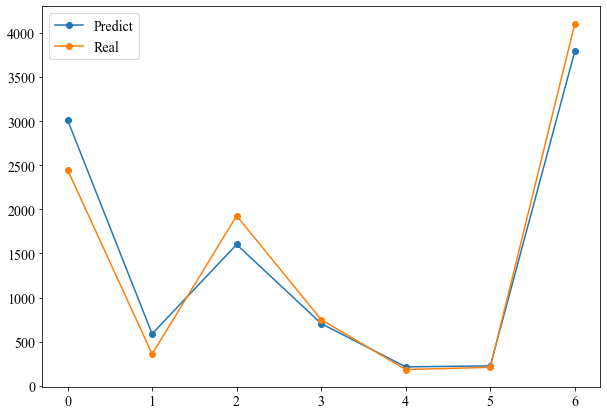

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
font = {'family': 'Times New Roman', 'size': '14'}  # SimSun宋体 'weight':'bold',
matplotlib.rc('font', **font)

fig, ax = plt.subplots(figsize=(10,7))  #定义新的三维坐标轴
ax.plot(y_pred, label='Predict', marker='o')
ax.plot(Ytest, label='Real', marker='o')
plt.legend()
plt.savefig('./figure.png', dpi=600)
plt.show()

In [16]:
# 输出网格搜索每组超参数的cv数据
for p, s in zip(grids.cv_results_['params'], grids.cv_results_['mean_test_score']):
	print(p, s)

{'C': 0.01, 'coef0': 0.01, 'degree': 3, 'gamma': 'auto', 'kernel': 'linear'} -0.4218610954186241
{'C': 0.01, 'coef0': 0.01, 'degree': 3, 'gamma': 'auto', 'kernel': 'poly'} -0.422178923296077
{'C': 0.01, 'coef0': 0.01, 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf'} -0.42214568837797783
{'C': 0.01, 'coef0': 0.01, 'degree': 3, 'gamma': 'auto', 'kernel': 'sigmoid'} -0.4221617097672473
{'C': 0.01, 'coef0': 0.01, 'degree': 3, 'gamma': 'scale', 'kernel': 'linear'} -0.4218610954186241
{'C': 0.01, 'coef0': 0.01, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'} -0.40773392002007736
{'C': 0.01, 'coef0': 0.01, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'} -0.4220884536310202
{'C': 0.01, 'coef0': 0.01, 'degree': 3, 'gamma': 'scale', 'kernel': 'sigmoid'} -0.42215397611466565
{'C': 0.01, 'coef0': 0.01, 'degree': 8, 'gamma': 'auto', 'kernel': 'linear'} -0.4218610954186241
{'C': 0.01, 'coef0': 0.01, 'degree': 8, 'gamma': 'auto', 'kernel': 'poly'} -0.42218560839020436
{'C': 0.01, 'coef0': 0.01, 'degre

In [17]:
grids.cv_results_['mean_test_score'].max()

0.9082803828708942

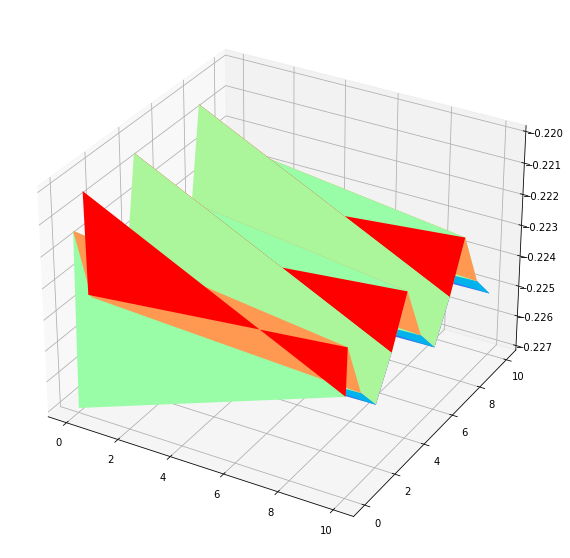

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10,10))  #定义新的三维坐标轴
ax3 = plt.axes(projection='3d')

#定义三维数据
xx = param['coef0']
yy = param['gamma']
X_, Y_ = np.meshgrid(xx, yy)
Z_ = grids.cv_results_['mean_test_score'].reshape(len(yy), -1)


#作图
ax3.plot_surface(X_, Y_, Z_, cmap='rainbow')
# ax3.contour(X,Y,Z,offset=-2, cmap='rainbow')   #等高线图，要设置offset，为Z的最小值
plt.show()